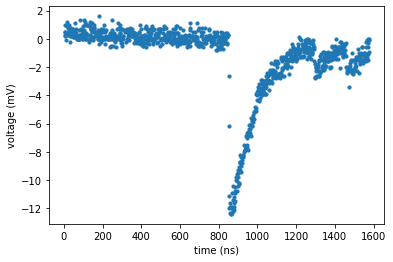

In [8]:
import matplotlib.pyplot as plt
import pylab
import numpy as np


with open("../data/Jun14Scan/400.txt") as f:
    events = f.read().split('-- Event')


lines = events[73].split('\n')
time = []
voltage = []
#6 - 1028
for line in lines[6:1028]:
        
    values = line.split()
    if float(values[3]) < 5:
        time.append(float(values[2]))
        voltage.append(float(values[3]))
    
plt.scatter(time,voltage,s=10)
plt.xlabel('time (ns)')
plt.ylabel('voltage (mV)')
plt.show()

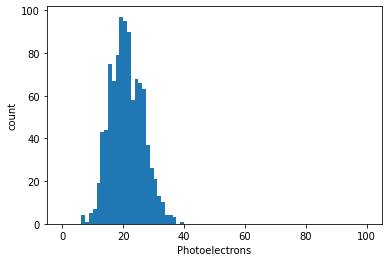

Average:
21.0701875
5.348096138682788
1000


In [17]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

with open("../data/Jun14Scan/3.txt") as f:
    events = f.read().split('-- Event')

peaktopeak = []    
    
for event in events:
    lines = event.split('\n')
    maxvoltage = -100000;
    minvoltage = 100000;
    for line in lines[500:600]:
        
        values = line.split()
        if float(values[3]) < minvoltage:
            minvoltage = float(values[3])
        if float(values[3]) > maxvoltage and float(values[3]) < 5:
            maxvoltage = float(values[3])
    if maxvoltage - minvoltage > 0 and maxvoltage - minvoltage < 1000:     
        peaktopeak.append((maxvoltage - minvoltage)/1.6)
    if maxvoltage - minvoltage > 1000:
        print(events.index(event))
plt.hist(peaktopeak,80,range=(0,100))
plt.xlabel('Photoelectrons')
plt.ylabel('count')
#plt.axvline(3.1,color='red',label='First peak: 3.1')
#plt.axvline(4.7,color='green',label='Second peak: 4.7')
#plt.axvline(6.3,color='blue',label='Third peak: 6.3')
#plt.legend(fontsize=17,loc='upper right')
plt.show()
print("Average:")
print(sum(peaktopeak) / len(peaktopeak))
print(np.std(peaktopeak))
print(len(peaktopeak))